In [199]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Load Data

In [3]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
# transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [4]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,84,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,84,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,69,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [5]:
# merge the charts and tracks dataset
streams_df = charts_df.merge(tracks_df, on='track_id', how='left')
streams_df = streams_df.drop(columns='track_name_y')
streams_df = streams_df.rename(columns={'track_name_x': 'track_name'})
streams_df['date']=pd.to_datetime(streams_df['date'])
streams_df.set_index("date", inplace=True)

streams_df.head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240.0,2016-11-17,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.0,0.0830,0.301,174.152
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240.0,2016-11-17,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.0,0.0830,0.301,174.152
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466.0,2016-10-28,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.0,0.0902,0.494,85.043
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466.0,2016-10-28,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.0,0.0902,0.494,85.043
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960.0,2016-07-29,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.0,0.1110,0.661,95.010


In [6]:
charts_df.shape, tracks_df.shape, streams_df.shape

((416000, 6), (4467, 19), (420460, 22))

In [7]:
#streams_df.info()

In [8]:
streams_df.describe()

,position,streams,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,420460.000000,420460.000000,420324.000000,420324.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000
mean,100.343814,55519.089997,228996.164126,56.617117,0.618459,0.543962,5.416826,-7.218115,0.785960,0.068791,0.345804,0.003879,0.147914,0.439020,117.220422
std,57.740670,45543.487328,49680.167354,28.449394,0.137624,0.182555,3.539879,2.767078,0.410155,0.069669,0.282184,0.040880,0.101242,0.202998,27.764570
min,1.000000,11004.000000,0.000000,0.000000,0.174000,0.025000,0.000000,-24.250000,0.000000,0.023200,0.000002,0.000000,0.021500,0.032000,50.538000
25%,50.000000,28189.000000,197436.000000,53.000000,0.524000,0.409000,2.000000,-8.624000,1.000000,0.032700,0.092300,0.000000,0.091000,0.284000,95.010000
50%,100.000000,38377.000000,218800.000000,66.000000,0.630000,0.544000,6.000000,-6.954000,1.000000,0.043100,0.268000,0.000000,0.111000,0.422000,115.457000
75%,150.000000,64914.000000,255608.000000,77.000000,0.713000,0.681000,8.000000,-5.220000,1.000000,0.070500,0.573000,0.000008,0.165000,0.570000,136.041000
max,200.000000,782316.000000,613026.000000,96.000000,0.980000,0.996000,11.000000,0.175000,1.000000,0.884000,0.994000,0.962000,0.955000,0.978000,215.090000


In [9]:
def plot_charts(artist):
    data1=streams_df[streams_df.artist==artist]['streams'].resample("MS").sum()/1000000
    #data2=streams_df[streams_df.artist==artist]['track_id'].resample("MS").count()
    data2=streams_df[streams_df.artist==artist]['streams'].resample("MS").sum().cumsum()/1000000
    data3=data1.pct_change()
    data4=streams_df[streams_df.artist==artist]['position'].resample("MS").mean()

    #line chart of monthly streams
    fig= plt.figure(figsize=(15,4),)
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    #default is line so you can omit kind= parameter
    
    '''
    data1[:-1].plot(ax=ax1, kind='line')
    data2.plot(ax=ax2, kind='line')
    data3[:-1].plot(ax=ax3, kind='line')
    data4[:-1].plot(ax=ax4, kind='line')
    '''
    
    
    #'''
    data1.plot(ax=ax1, kind='line')
    data2.plot(ax=ax2, kind='line')
    data3.plot(ax=ax3, kind='line')
    data4.plot(ax=ax4, kind='line')
    #'''
    


    #Uncomment for cleaner x labels
    #ax1.set_xticklabels([x.strftime('%Y-%m') for x in ar_streams.index])

    #ax1.set_xlabel('Date')
    ax1.set_ylabel('common ylabel')

    ax1.set_title('Monthly Streams (%s)' % artist)
    ax2.set_title('Cumulative Streams')
    ax3.set_title('Monthly % Change')
    ax4.set_title('Avg Position')

    ax4.set_yticks([1]+np.arange(0, 210, 50).tolist())
    ax4.set_ylim([200, 1])


# Artist EDA- I Belong To The Zoo

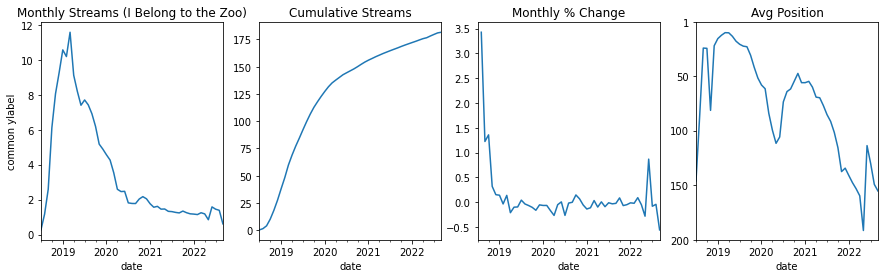

In [11]:
plot_charts("I Belong to the Zoo")

In [29]:
streams_df[streams_df.artist=="I Belong to the Zoo"].reset_index().groupby(["track_id","track_name"]).agg( \
                                                                                total_streams=("streams","sum"),
                                                                                first_appearance=("date","min"), 
                                                                                last_appearance=("date","max"),
                                                                                avg_position=("position","mean")).reset_index()

,track_id,track_name,total_streams,first_appearance,last_appearance,avg_position
0,1X4l4i472kW5ofFP8Xo0x0,Sana - Single Version,136668347,2018-07-22,2022-09-15,63.805316
1,5NXdUJ3Z2jhlp2u1cj6f7m,Balang Araw - Single Version,44989282,2018-10-26,2020-09-12,71.159278


# Market EDA

In [91]:
### DF Series into Dictionary
artist_dict=pd.Series(tracks_df.artist_name.values,index=(tracks_df.artist_id)).to_dict()
#arr_df['track_id'] = arr_df['track_id'].apply(lambda x:bnb_tracks_dict.get(x))

#artist_dict

<AxesSubplot:xlabel='date'>

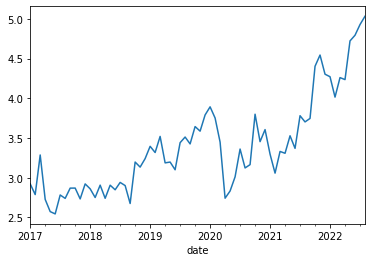

In [327]:
(streams_df["streams"].resample('MS').sum()/100000000)[:-1].plot()

In [70]:
df_3_groups = streams_df\
    .groupby(['artist_id'])['streams']\
    .resample('M').sum().reset_index()\
    .sort_values('streams', ascending=False)
#df_ed = df_ed.set_index('date')
df_3_groups['album_name'] = df_3_groups['artist_id'].apply(lambda x:
                                              'Big3' if ( (artist_dict.get(x) == 'Arthur Nery') | \
                                                         (artist_dict.get(x) == 'Adie') |
                                                         (artist_dict.get(x) == 'Zack Tabudlo') ) else
                                              'Dominant Bands' if ((artist_dict.get(x) == 'Ben&Ben') |
                                                         (artist_dict.get(x) == 'NOBITA'))
                                                           else 'others')

#df_3_groups = df_3_groups.set_index('date')
df_3_groups=df_3_groups.groupby(["date","album_name"])[["streams"]].sum().reset_index()
df_3_groups

,date,album_name,streams
0,2017-01-31,others,292302062
1,2017-02-28,others,278852487
2,2017-03-31,others,328681547
3,2017-04-30,others,272751612
4,2017-05-31,others,257421606
...,...,...,...
150,2022-08-31,Dominant Bands,29869675
151,2022-08-31,others,405157729
152,2022-09-30,Big3,30814853
153,2022-09-30,Dominant Bands,17381682


In [71]:
df_3_groups.album_name.nunique()

3

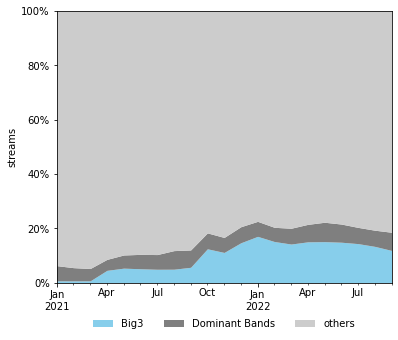

In [105]:

plt.figure(figsize=(6, 5))
ax = plt.subplot(111)

color_list = ['skyblue', 'C7', '0.8']
# reshape
data = df_3_groups.pivot(index='date', columns='album_name', values='streams')
# normalize with monthly sums
data[data.columns] = 100*data[data.columns].div(data.sum(axis=1), axis=0)
data=data.loc['2021-01-01':'2022-12-31']

# plot
data.plot.area(ax=ax, lw=0, color=color_list)

# custom ticks
plt.yticks(np.arange(0, 120, 20), [str(x)+'%' for x in np.arange(0, 120, 20)])
plt.ylabel('streams')
plt.ylim([0, 100])

plt.xlabel('')
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(
    0.5, -0.10), frameon=False, ncol=3)

#--------------------------------------------------------------

# Learning From Mainstay Artists


## Track Composition

In [108]:
tracks_dict=pd.Series(tracks_df.track_name.values,index=(tracks_df.track_id)).to_dict()
top5_names=["Arthur Nery", "Adie","Zack Tabudlo","Ben&Ben","NOBITA"]
artist_name=["I Belong to the Zoo"]
comb_names=top5_names



In [113]:
mainstay_df=pd.read_csv("data_sp/tracks_data.csv")

scaler = MinMaxScaler()
mainstay_df['loudness'] = scaler.fit_transform(mainstay_df[['loudness']])
mainstay_df['tempo'] =  scaler.fit_transform(mainstay_df[['tempo']])
mainstay_df

,Unnamed: 0,track_name,track_id,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Isa lang,0HAG6nIiEKd75yGpovuSJQ,Arthur Nery,0.429,0.464,6,0.601161,0,0.0719,0.78300,0.000000,0.0846,0.3750,0.509555
1,1,Pagsamo,0WZqHCoOBXqgCCIsUZLC2a,Arthur Nery,0.644,0.315,6,0.526642,1,0.0339,0.70600,0.001620,0.0962,0.3560,0.000000
2,2,Higa,7gfrASeOt73YWvpIv1fU8E,Arthur Nery,0.656,0.336,9,0.434707,1,0.0434,0.45300,0.000000,0.1060,0.1820,0.541943
3,3,Happy w u,0EA8jl8Wje9ALRKC8Qlzyt,Arthur Nery,0.596,0.182,6,0.000000,1,0.0378,0.90300,0.000000,0.0909,0.2680,0.430950
4,4,Binhi,092cPwFlwBXdB3QF3X469W,Arthur Nery,0.460,0.311,5,0.458804,1,0.0319,0.96100,0.000819,0.1890,0.2200,0.534737
5,5,TAKE ALL THE LOVE,2v6jmF6VQWS96x6tSg05IC,Arthur Nery,0.491,0.486,5,0.748847,1,0.0347,0.28500,0.000000,0.0976,0.2620,0.186682
6,6,Sinag (feat. Sam Benwick),5DARNIgi6aaJxGD5SKAUal,Arthur Nery,0.540,0.287,9,0.245268,1,0.0314,0.87600,0.000120,0.0803,0.2150,0.125112
7,7,Life Puzzle,42A9RtOizRYgILd4muMvto,Arthur Nery,0.719,0.234,4,0.160728,1,0.0884,0.58600,0.000000,0.0785,0.3620,0.282588
8,8,Cotton Candy,1t19LlMX4aomJ1U9MDzan8,Arthur Nery,0.473,0.371,1,0.456100,0,0.1280,0.69700,0.000000,0.1030,0.2920,0.999509
9,9,Hung Up,5YHXL4ggZEHZUgQBgLF0Oz,Arthur Nery,0.549,0.360,11,0.458088,1,0.0549,0.77100,0.000113,0.6910,0.2580,0.472044


In [150]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode',\
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']  

features = ['danceability', 'energy', 'loudness',\
                      'acousticness', 'liveness', 'valence', 'tempo']  

features = ['danceability', 'energy','valence', 'loudness' , 'tempo', 'liveness','acousticness',]  

columns_to_view = ['artist_name', 'track_name'] + features

In [151]:
df_features = mainstay_df[columns_to_view].copy()

#df_features['artist'] = [artist if artist in comb_names else 'all else'
                       #for artist in df_features['artist_name'].values]
    
# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name'])

# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
df_features_stacked = df_features_stacked.reset_index()
df_features_stacked = df_features_stacked.rename(columns={'level_2': 'feature'})

    
df_features_stacked

,track_name,artist_name,feature,value
0,Isa lang,Arthur Nery,danceability,0.429000
1,Isa lang,Arthur Nery,energy,0.464000
2,Isa lang,Arthur Nery,valence,0.375000
3,Isa lang,Arthur Nery,loudness,0.601161
4,Isa lang,Arthur Nery,tempo,0.509555
...,...,...,...,...
401,Balita,I Belong to the Zoo,valence,0.474000
402,Balita,I Belong to the Zoo,loudness,1.000000
403,Balita,I Belong to the Zoo,tempo,0.841267
404,Balita,I Belong to the Zoo,liveness,0.084700


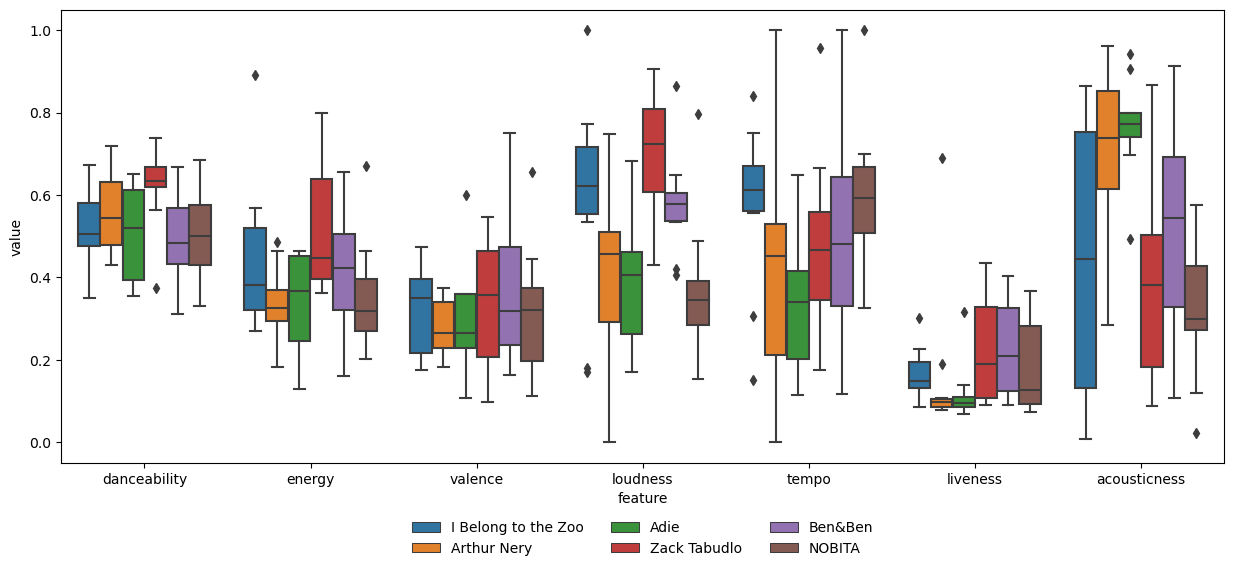

In [152]:
plt.figure(figsize=(15, 6), dpi=100)
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y='value',  hue='artist_name', ax=ax,
            hue_order=['I Belong to the Zoo']+top5_names, )#palette=['pink', 'C7'])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

## Song Release Timing

In [182]:
def plot_heatmap(artist,figx,figy):
    df_artist = streams_df[streams_df['artist'] == artist].groupby('track_name')[['streams']]\
    .resample('M').sum()
    df_artist = df_artist.reset_index()
    #df_artist = df_artist[df_artist['date'] < '2021-01-31']
    # clean long titles
    df_artist['track_name'] = df_artist['track_name'].apply(lambda x: x.split('(')[0])\
        .apply(lambda x: x.split(' - ')[0])
    df_artist

    #------------------------------------------------------
    arr_df = df_artist.pivot(index='track_name', columns='date', values='streams')
    # divide by 1M to show streams in millions
    arr_df = arr_df/1000000
    arr_df.fillna(0, inplace=True)
    arr_df['total_streams'] = arr_df.sum(axis=1)
    #arr_df = arr_df.sort_values('total_streams',ascending=False)
    arr_df

    #----------------------------------------------------------------------------
    plt.figure(figsize=(figx, figy))
    ax = plt.subplot(111)

    # get all month columns and specify format for xticks
    moncols = arr_df.columns[:-1]
    yymm_cols = pd.Series(moncols.values).apply(lambda x: x.strftime('%Y-%m'))

    sns.heatmap(arr_df[moncols], ax=ax,
                cmap='viridis',
                cbar_kws={'label': 'million streams', 'ticks': np.arange(0, 20, 1)},
                xticklabels=yymm_cols, yticklabels=True, linecolor='0.1',linewidths=0.2)

    plt.ylabel('')
    plt.xlabel('')
    plt.show()

In [302]:
def plot_cycles(artist,date_filter=0,lag=170):
    complete_dates=pd.DataFrame({'date':pd.date_range(streams_df.index.min(), streams_df.index.max())}).set_index('date')

    #Filter Data by artist
    data=streams_df[streams_df.artist==artist]#["streams"]

    #Merge data into complete dates
    data = complete_dates.join(data, how='left').fillna(0)[["streams"]].reset_index()

    #Groupby date
    data = data.groupby('date')[['streams']].sum()

    #Stationary Transformation
    stationary_data=data.streams.interpolate().diff()[1:]


    #Add date filter
    
    if date_filter!=0:
        #date_filter='2021-01-01'
        data=data[date_filter:]
        stationary_data=stationary_data[date_filter:]


    #Timeseries Diff Plots
    fig = plt.figure(figsize=(15,3),dpi=200)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    data.plot(ax=ax1)
    stationary_data.plot(ax=ax2)
    ax1.set_title(artist)
    #plt.plot(stationary_data)

    #ACF and PACF plots
    fig = plt.figure(figsize=(15,6),dpi=200)
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    #lag=170
    acf = plot_acf(stationary_data, lags=lag, ax=ax1)
    pacf = plot_pacf(stationary_data, lags=lag, ax=ax2)
    

### I Belong to the Zoo

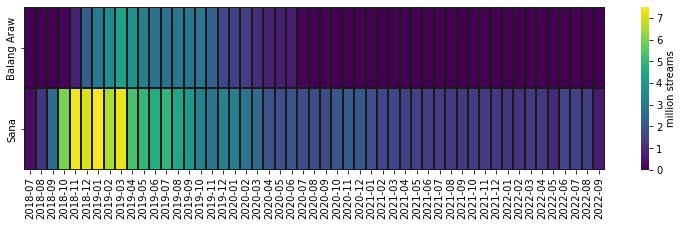

In [192]:
plot_heatmap("I Belong to the Zoo",13, 3)

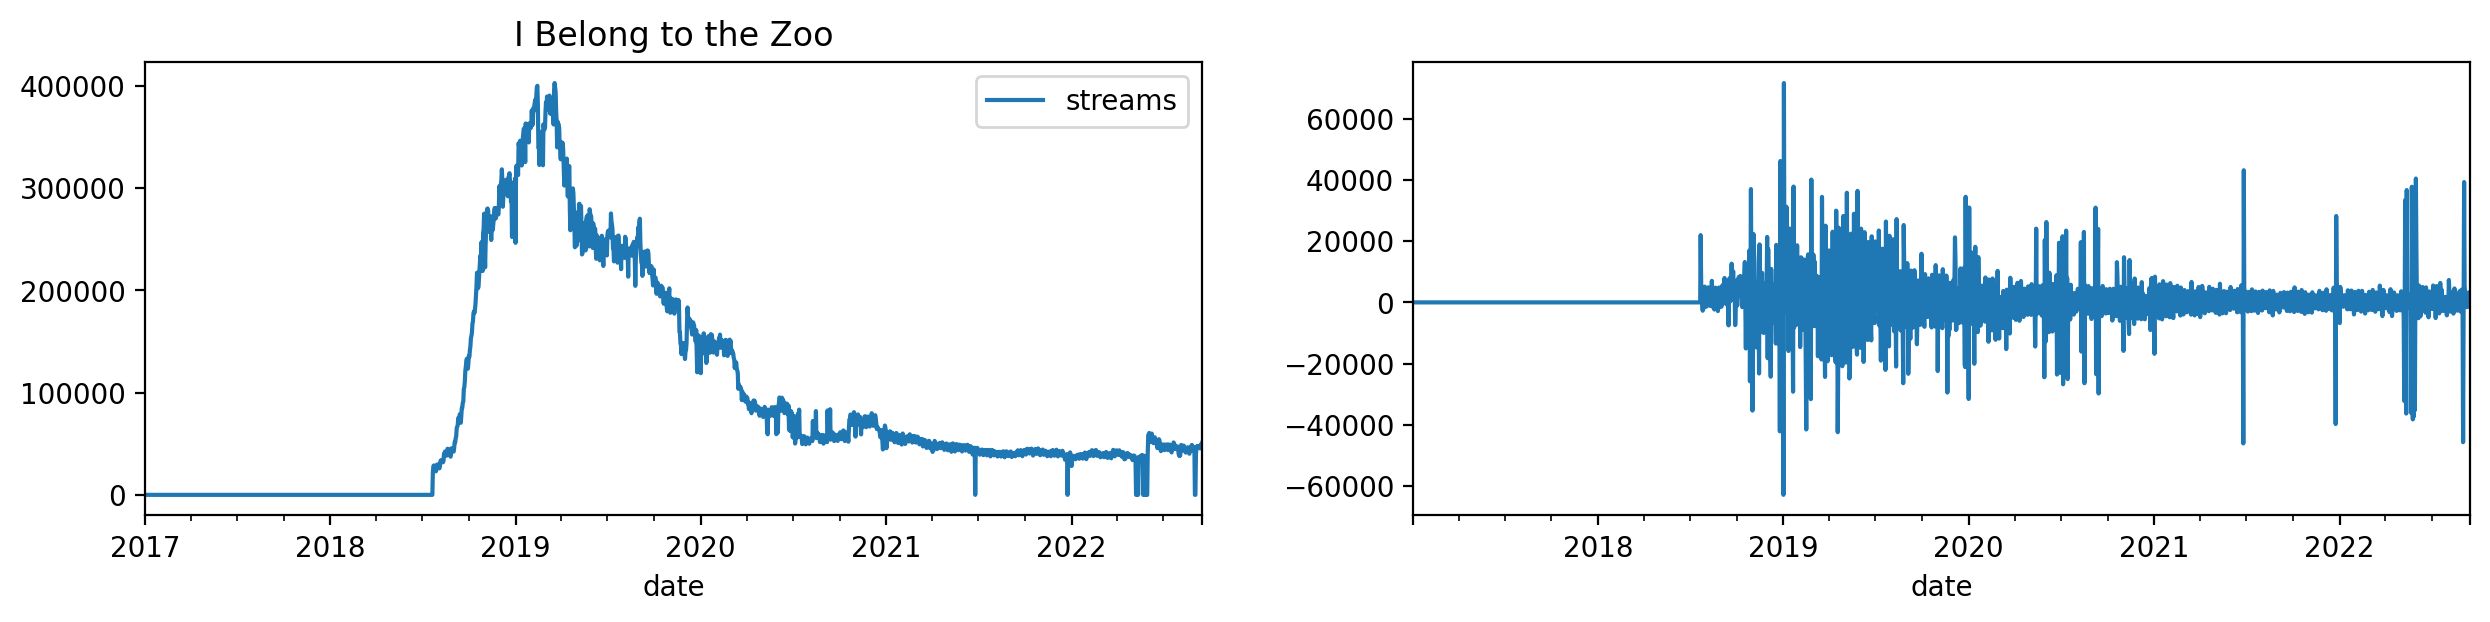

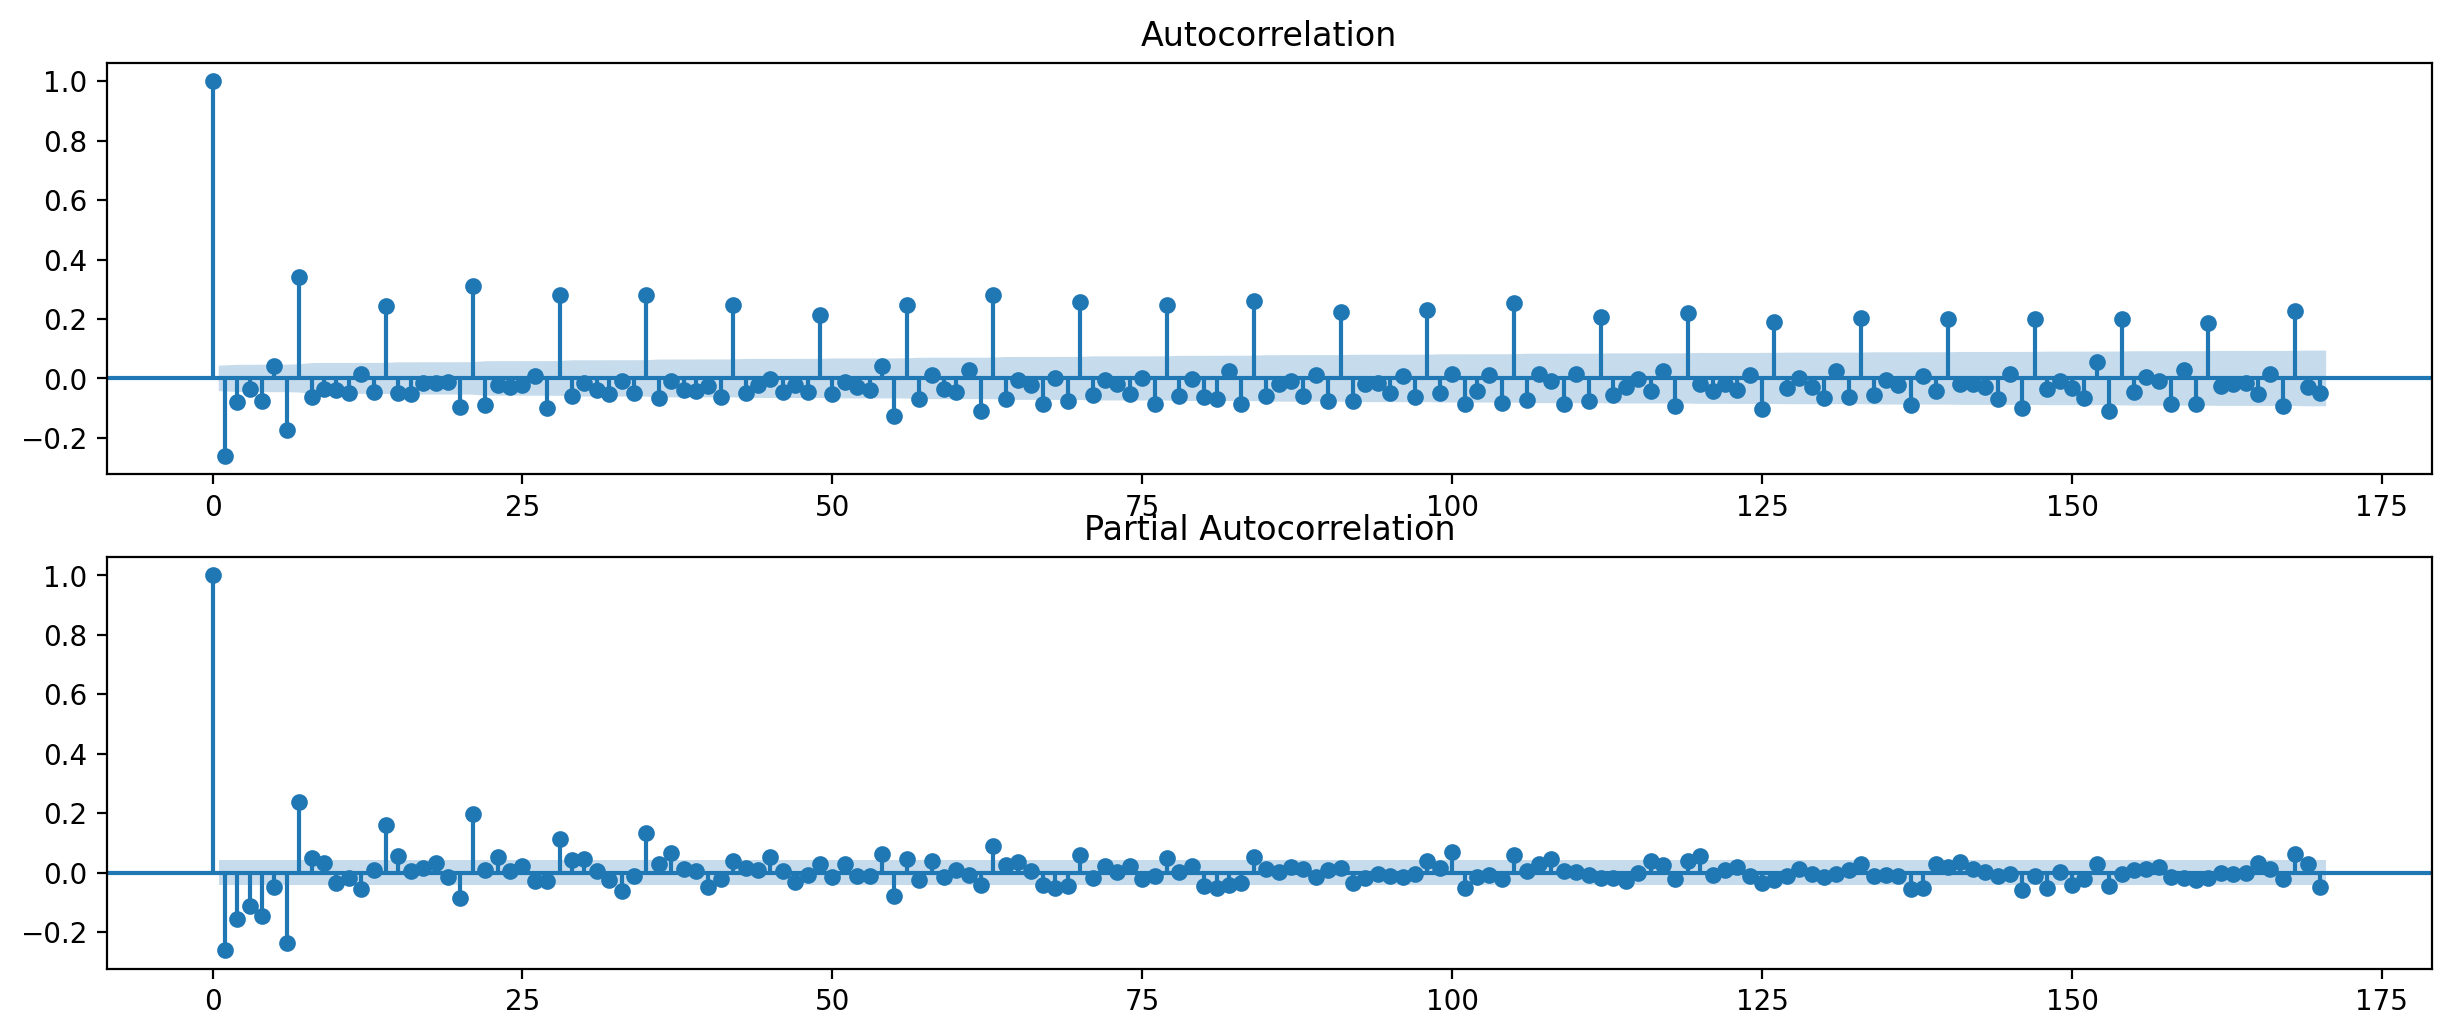

In [306]:
plot_cycles("I Belong to the Zoo")

### Zack Tabudlo

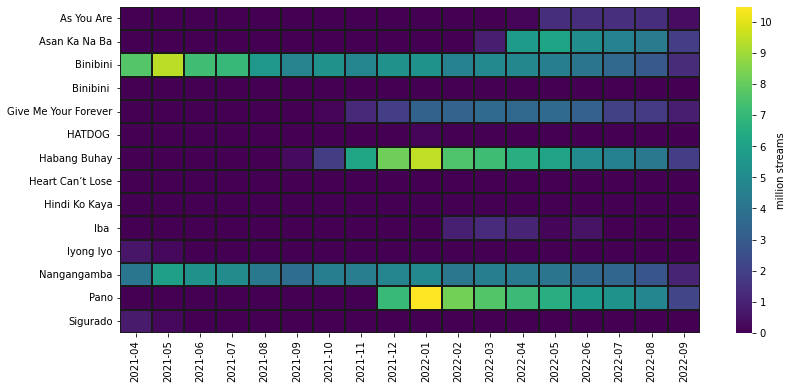

In [188]:
plot_heatmap("Zack Tabudlo",13, 6)

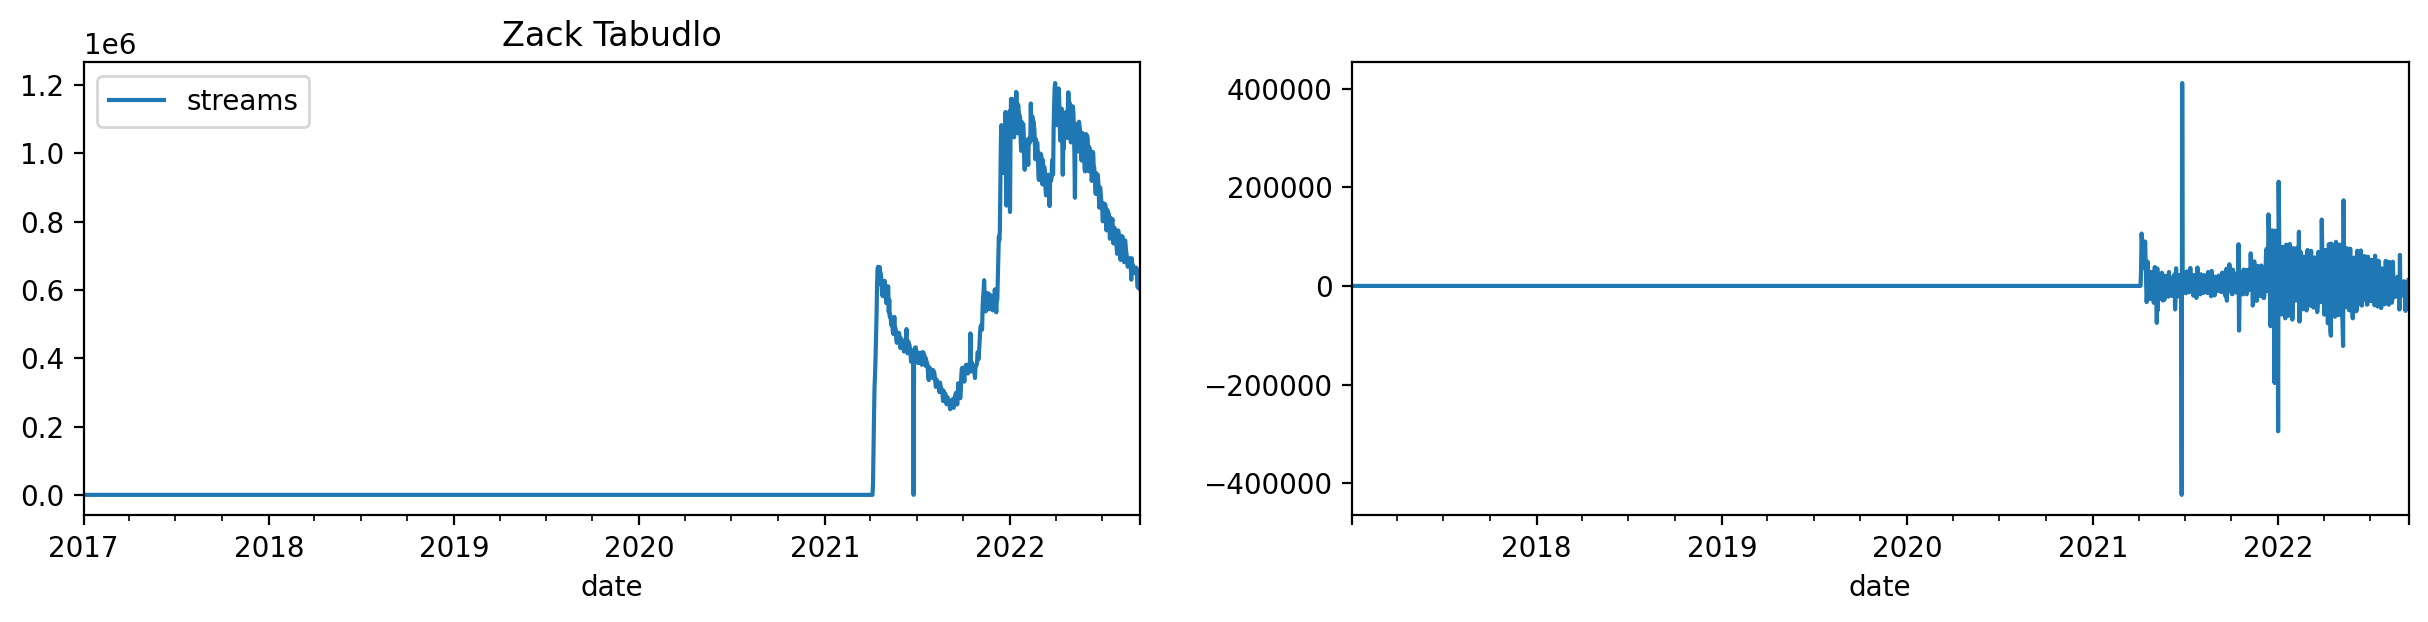

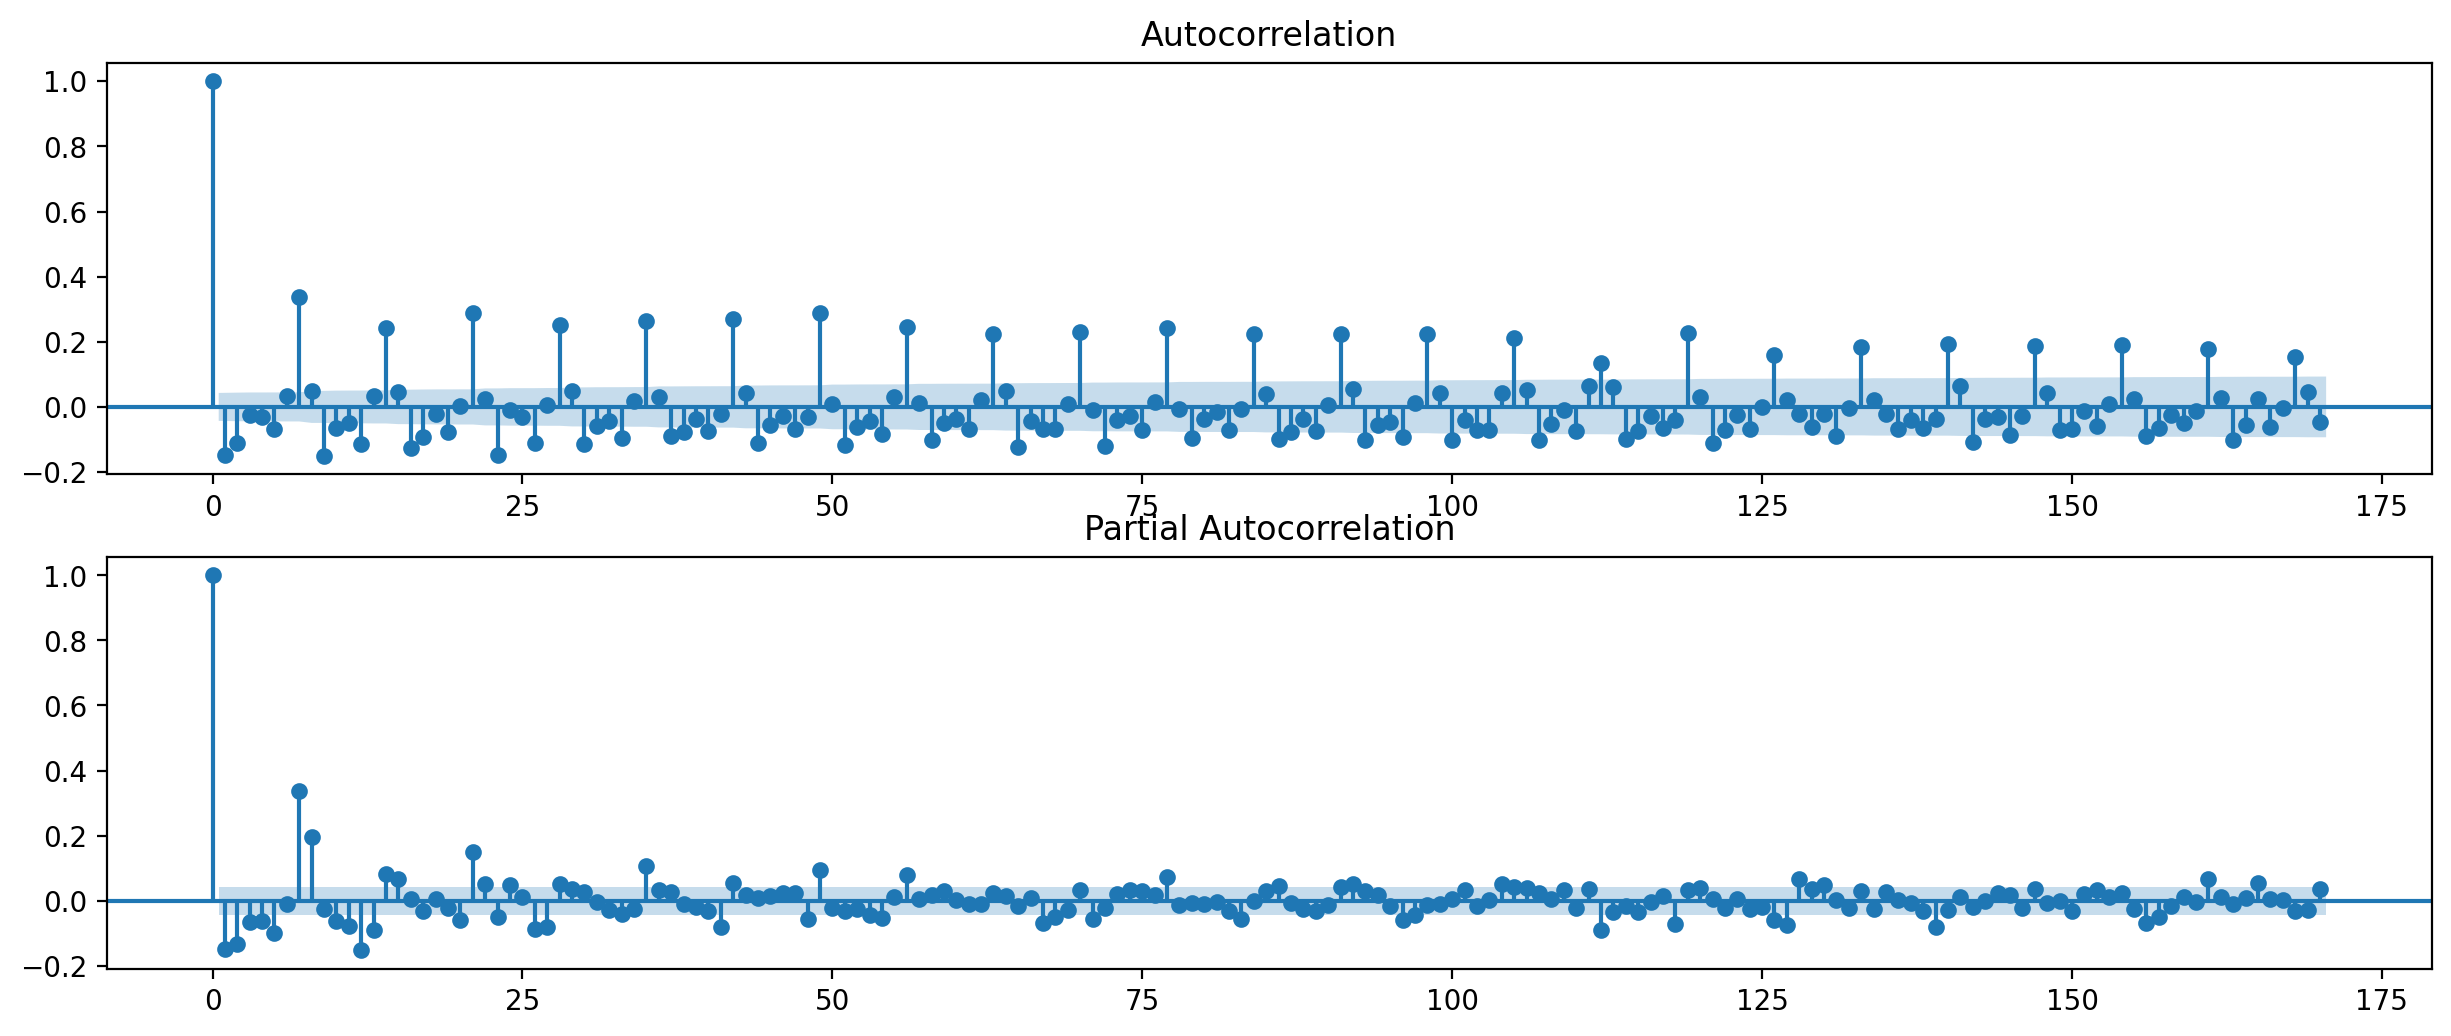

In [307]:
plot_cycles("Zack Tabudlo")

### Arthur Nery

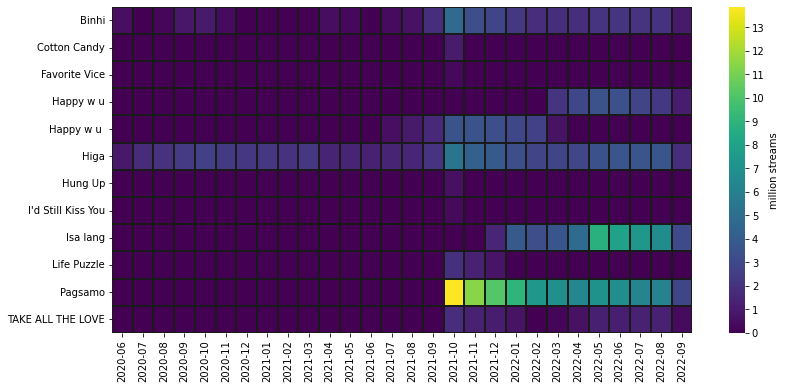

In [189]:
plot_heatmap("Arthur Nery",13, 6)

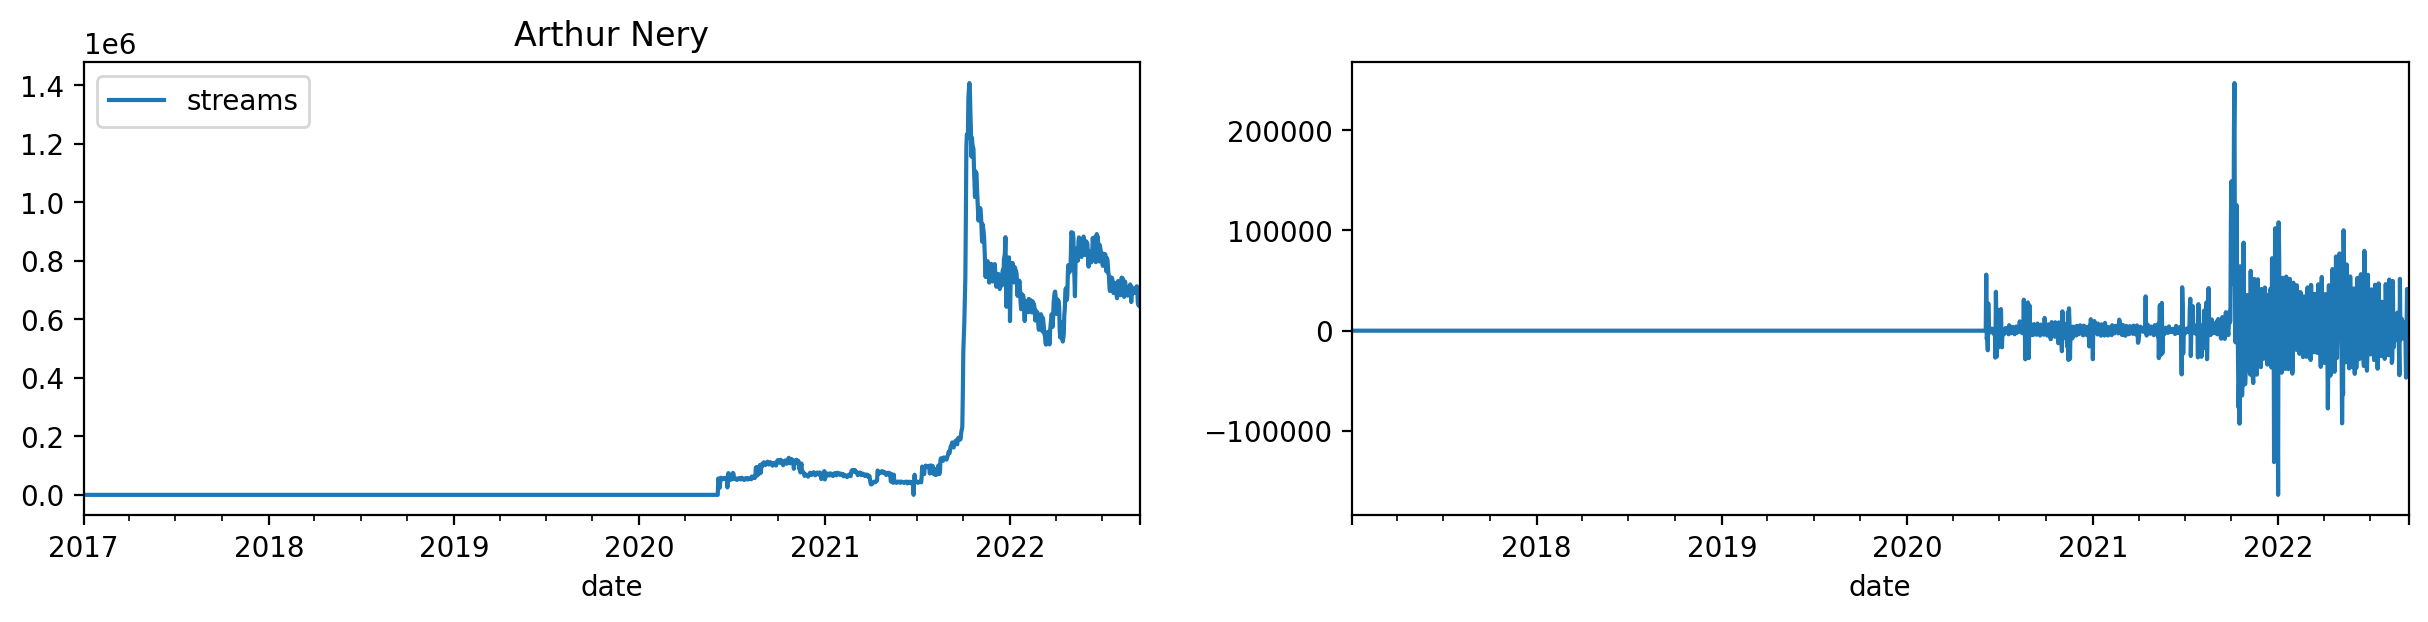

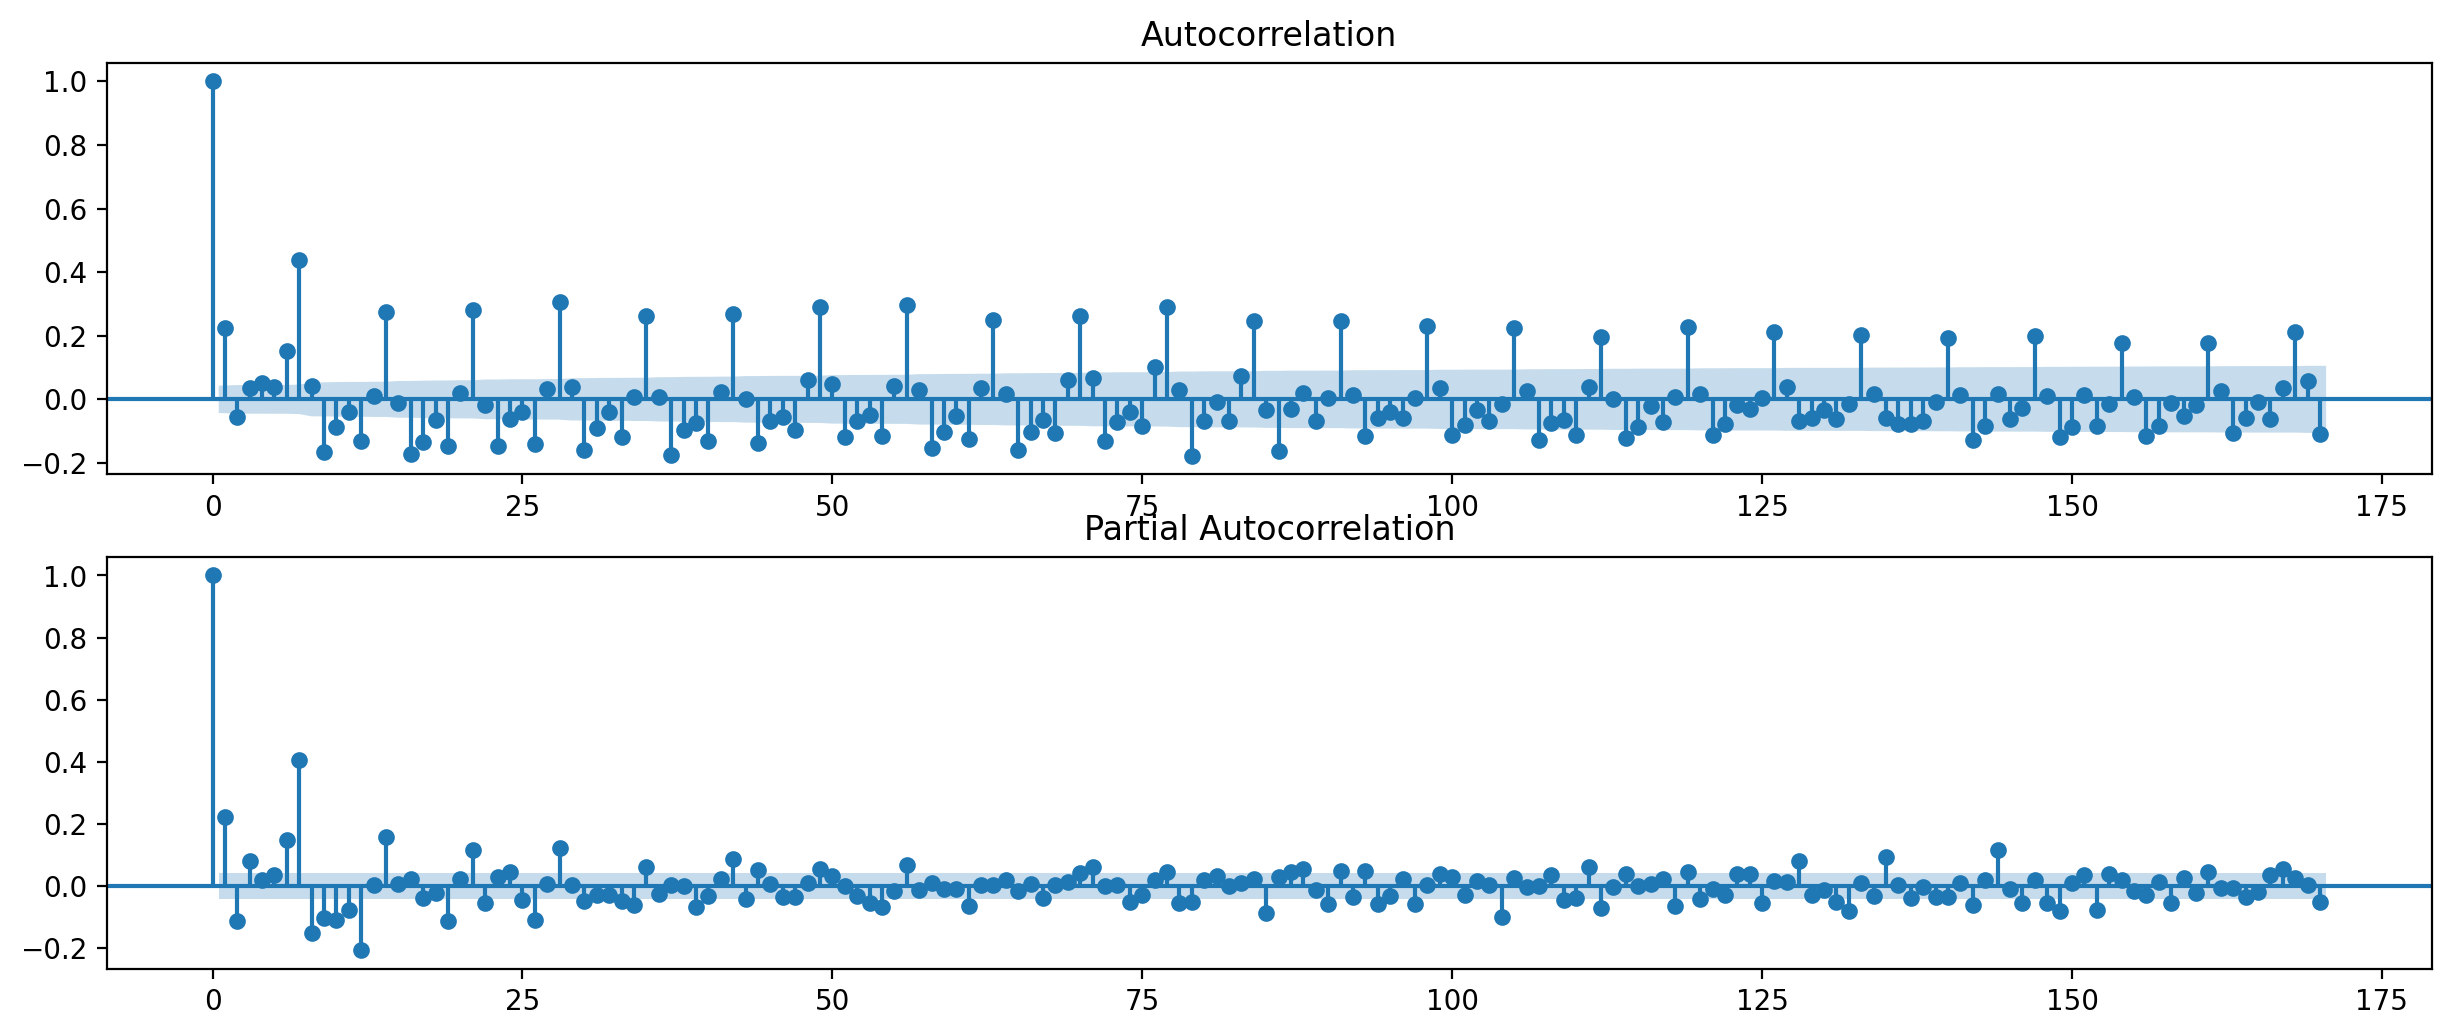

In [308]:
plot_cycles("Arthur Nery")

### Adie

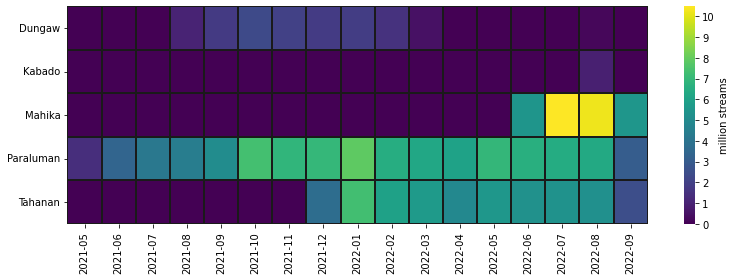

In [194]:
plot_heatmap("Adie",13, 4)

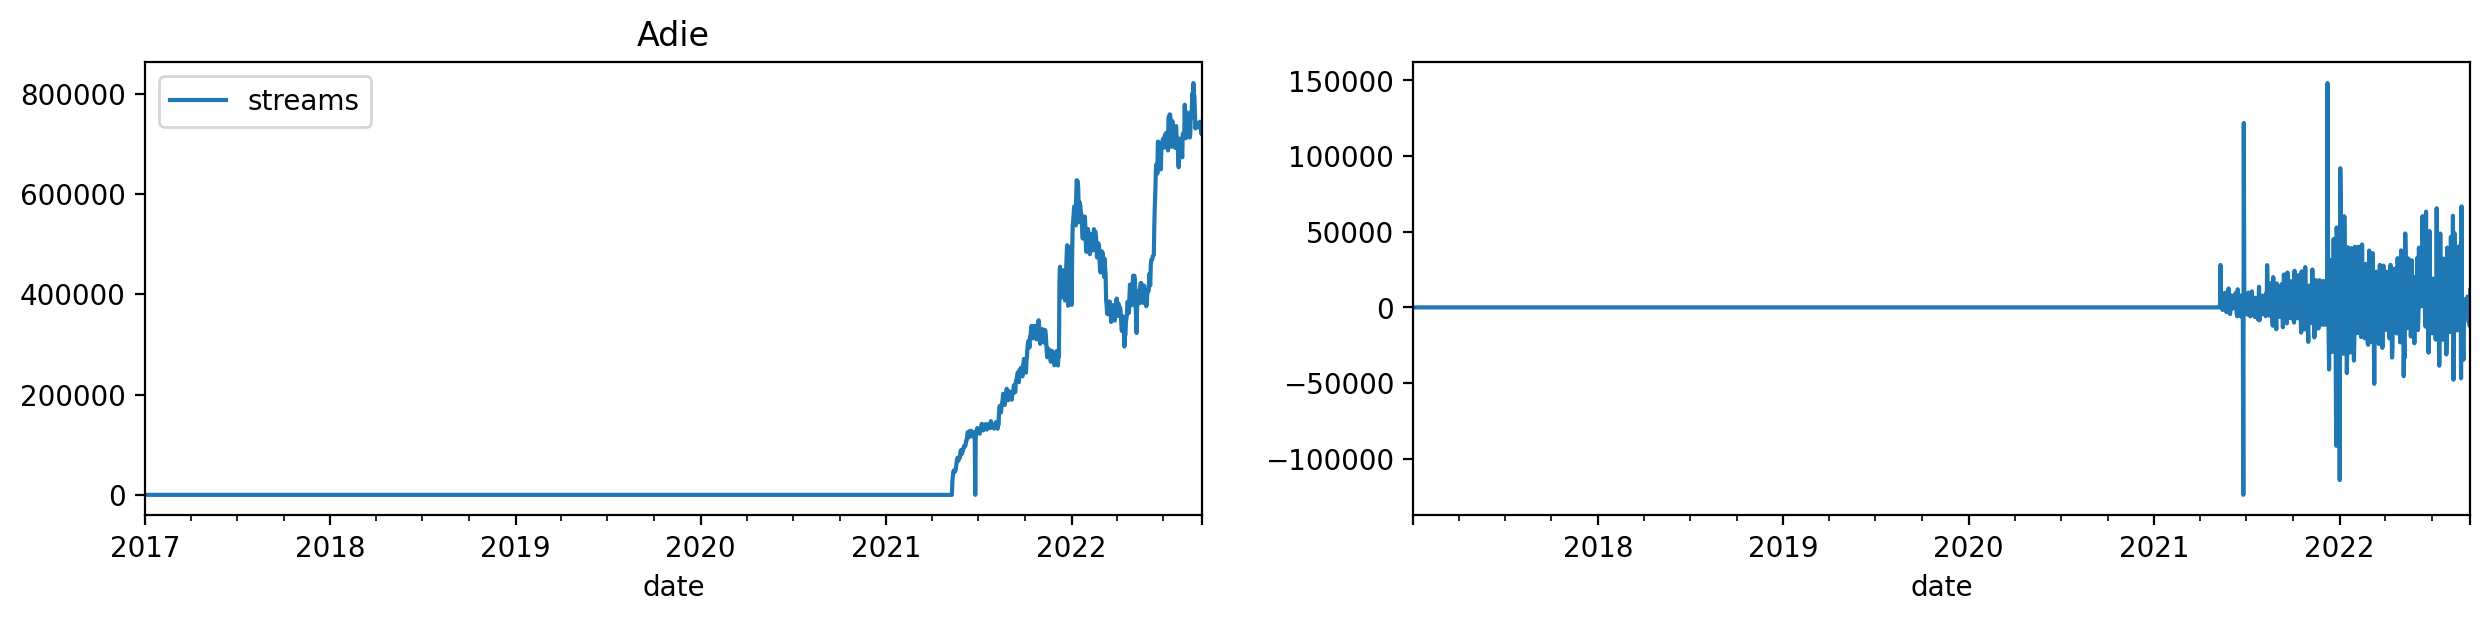

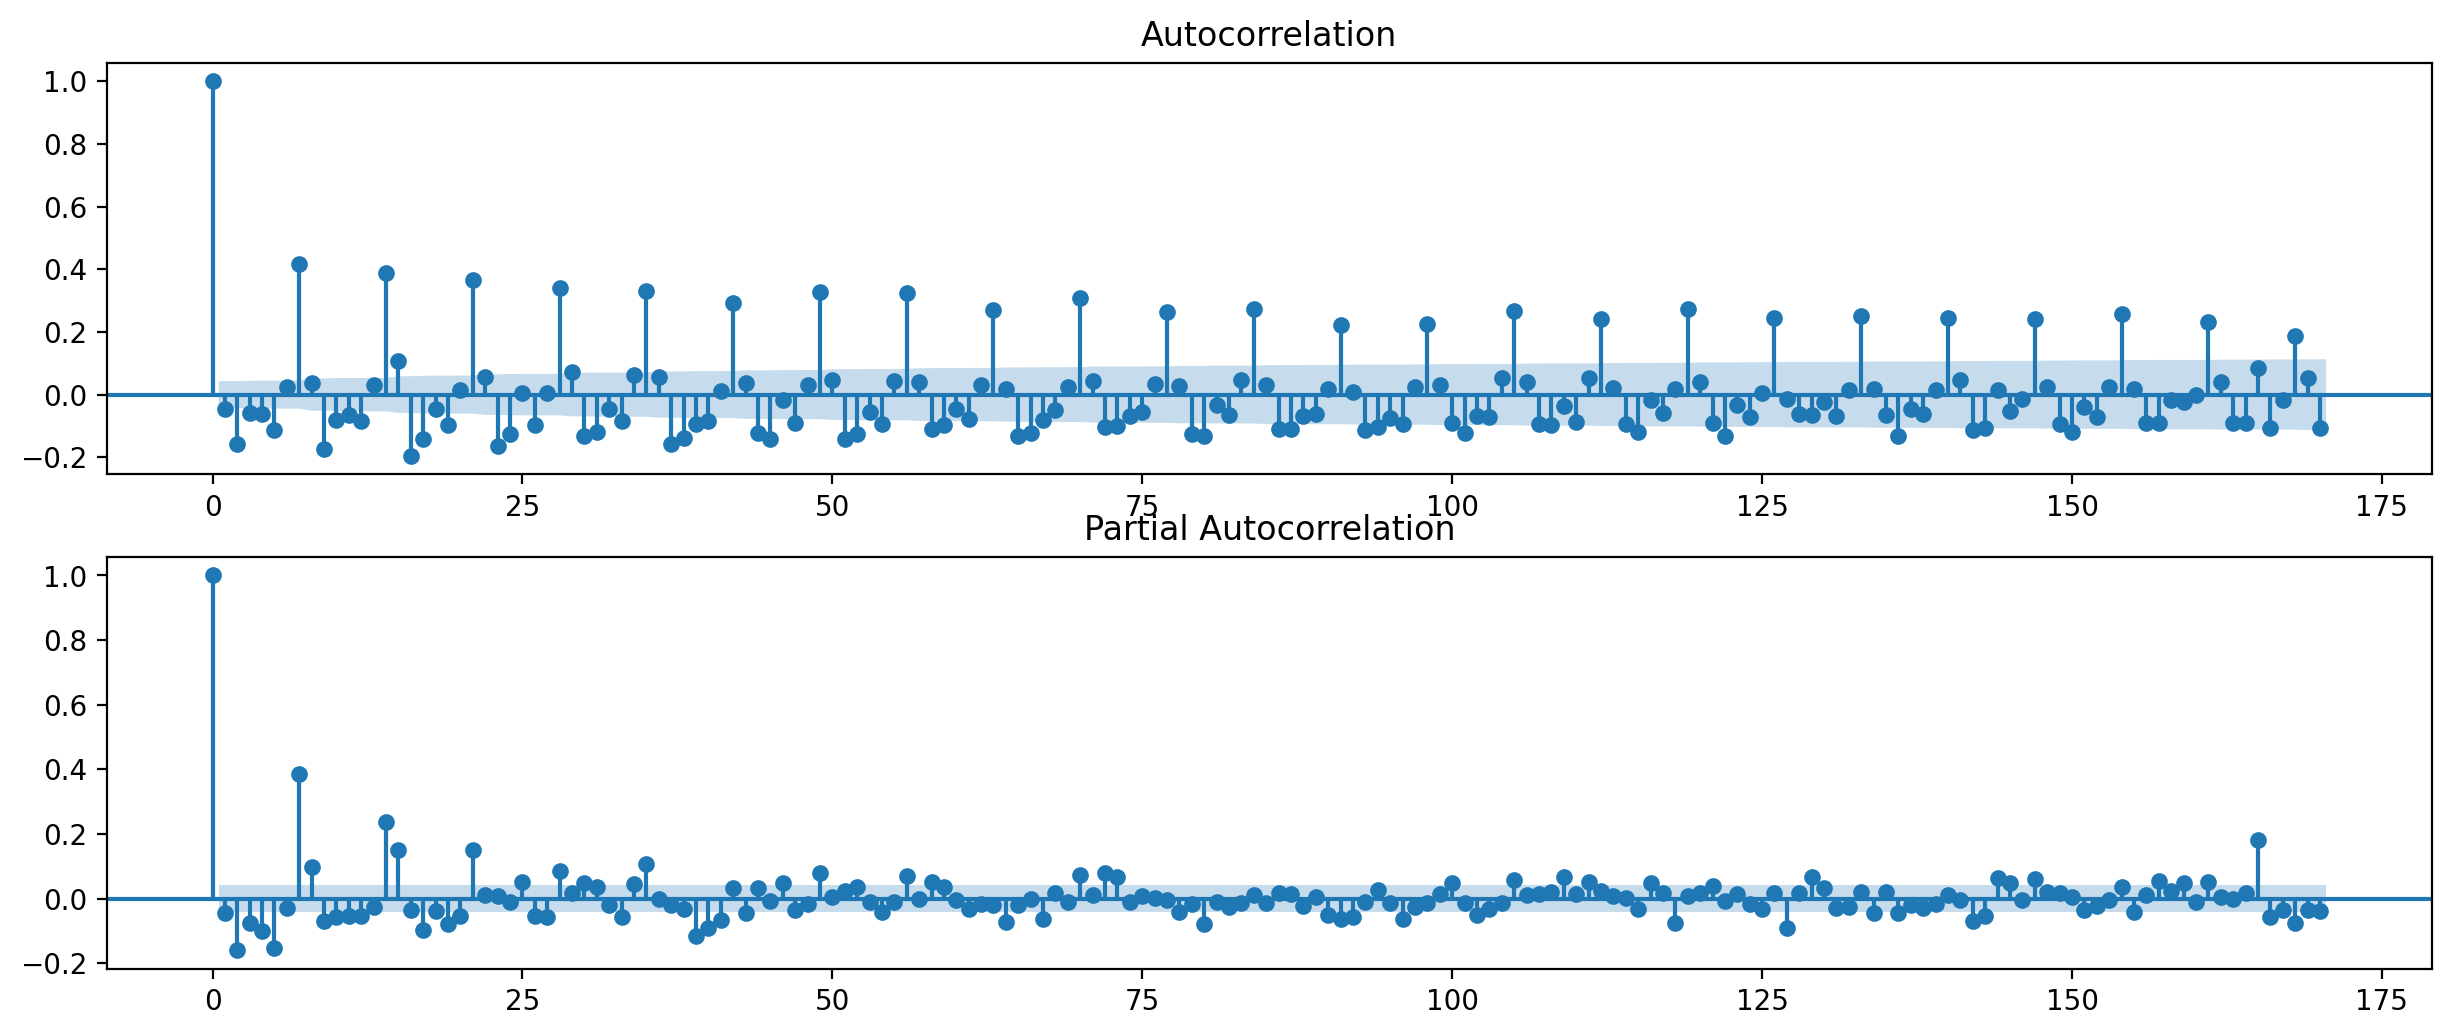

In [309]:
plot_cycles("Adie")

### Ben&Ben

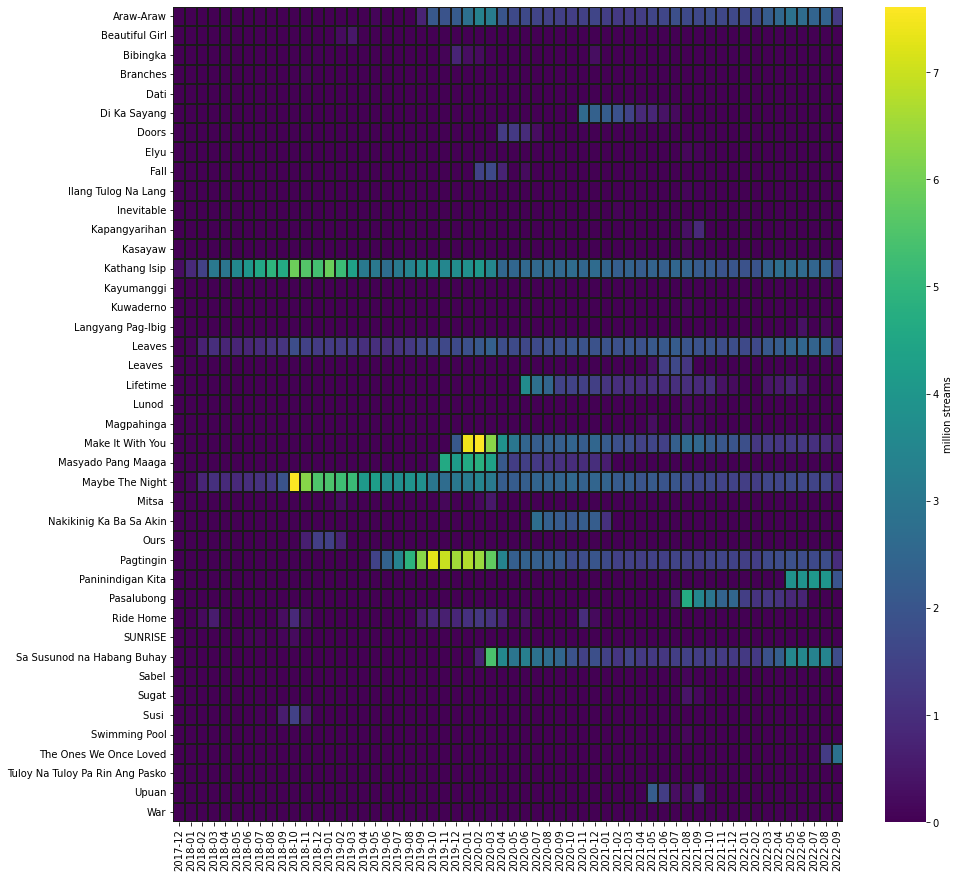

In [196]:
plot_heatmap("Ben&Ben",15, 15)

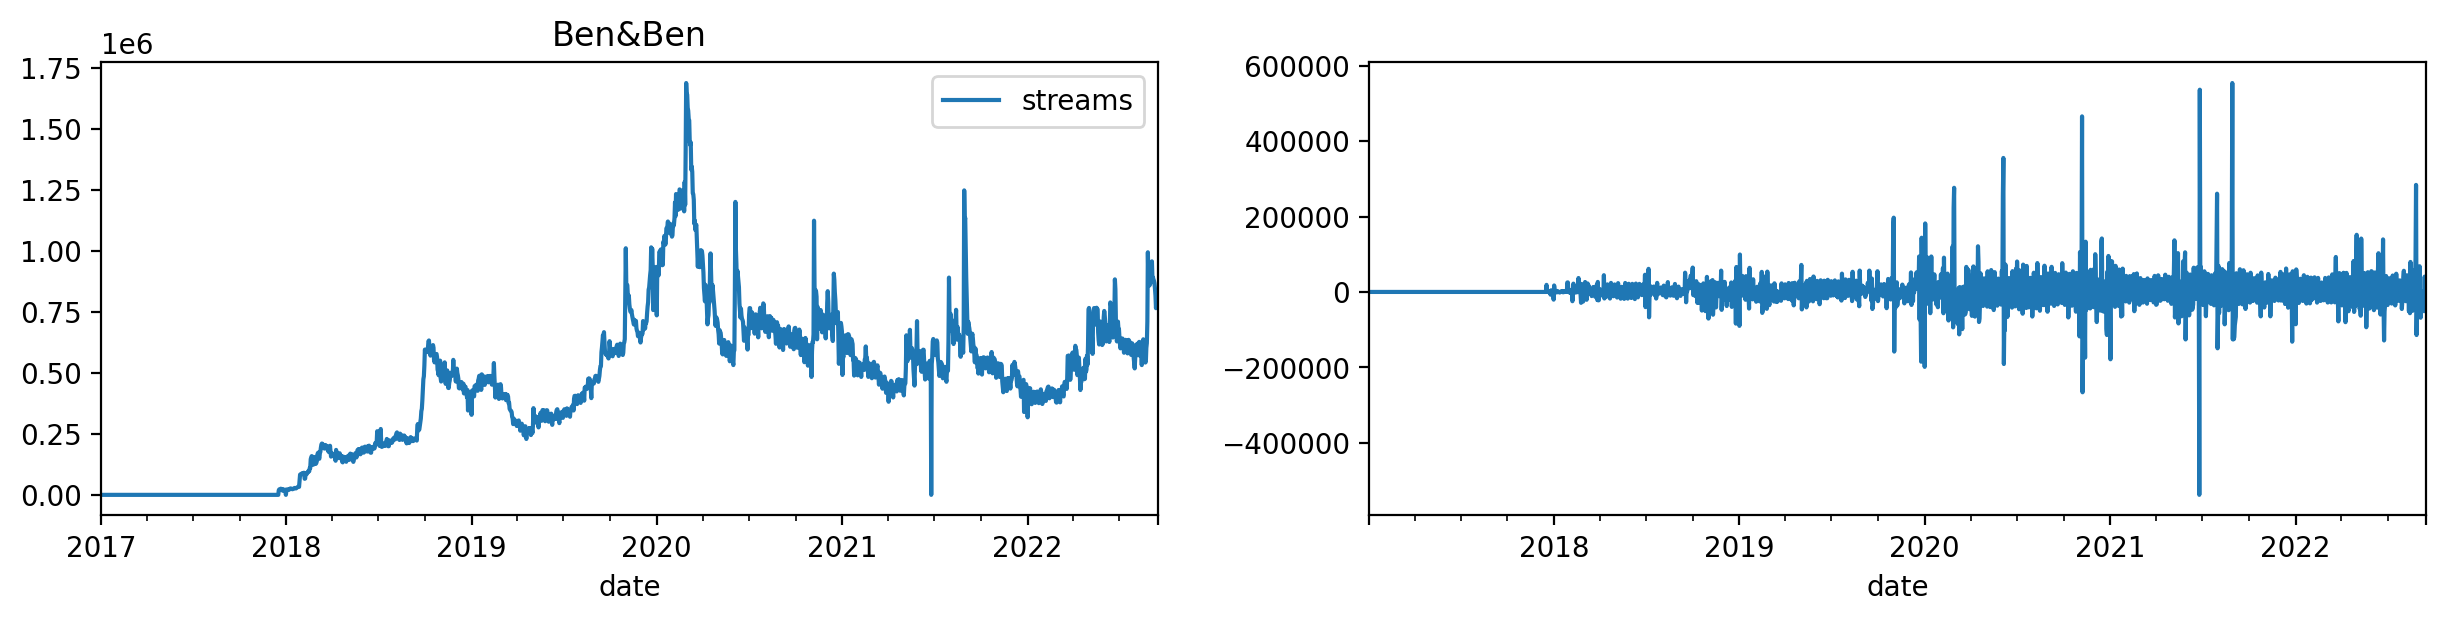

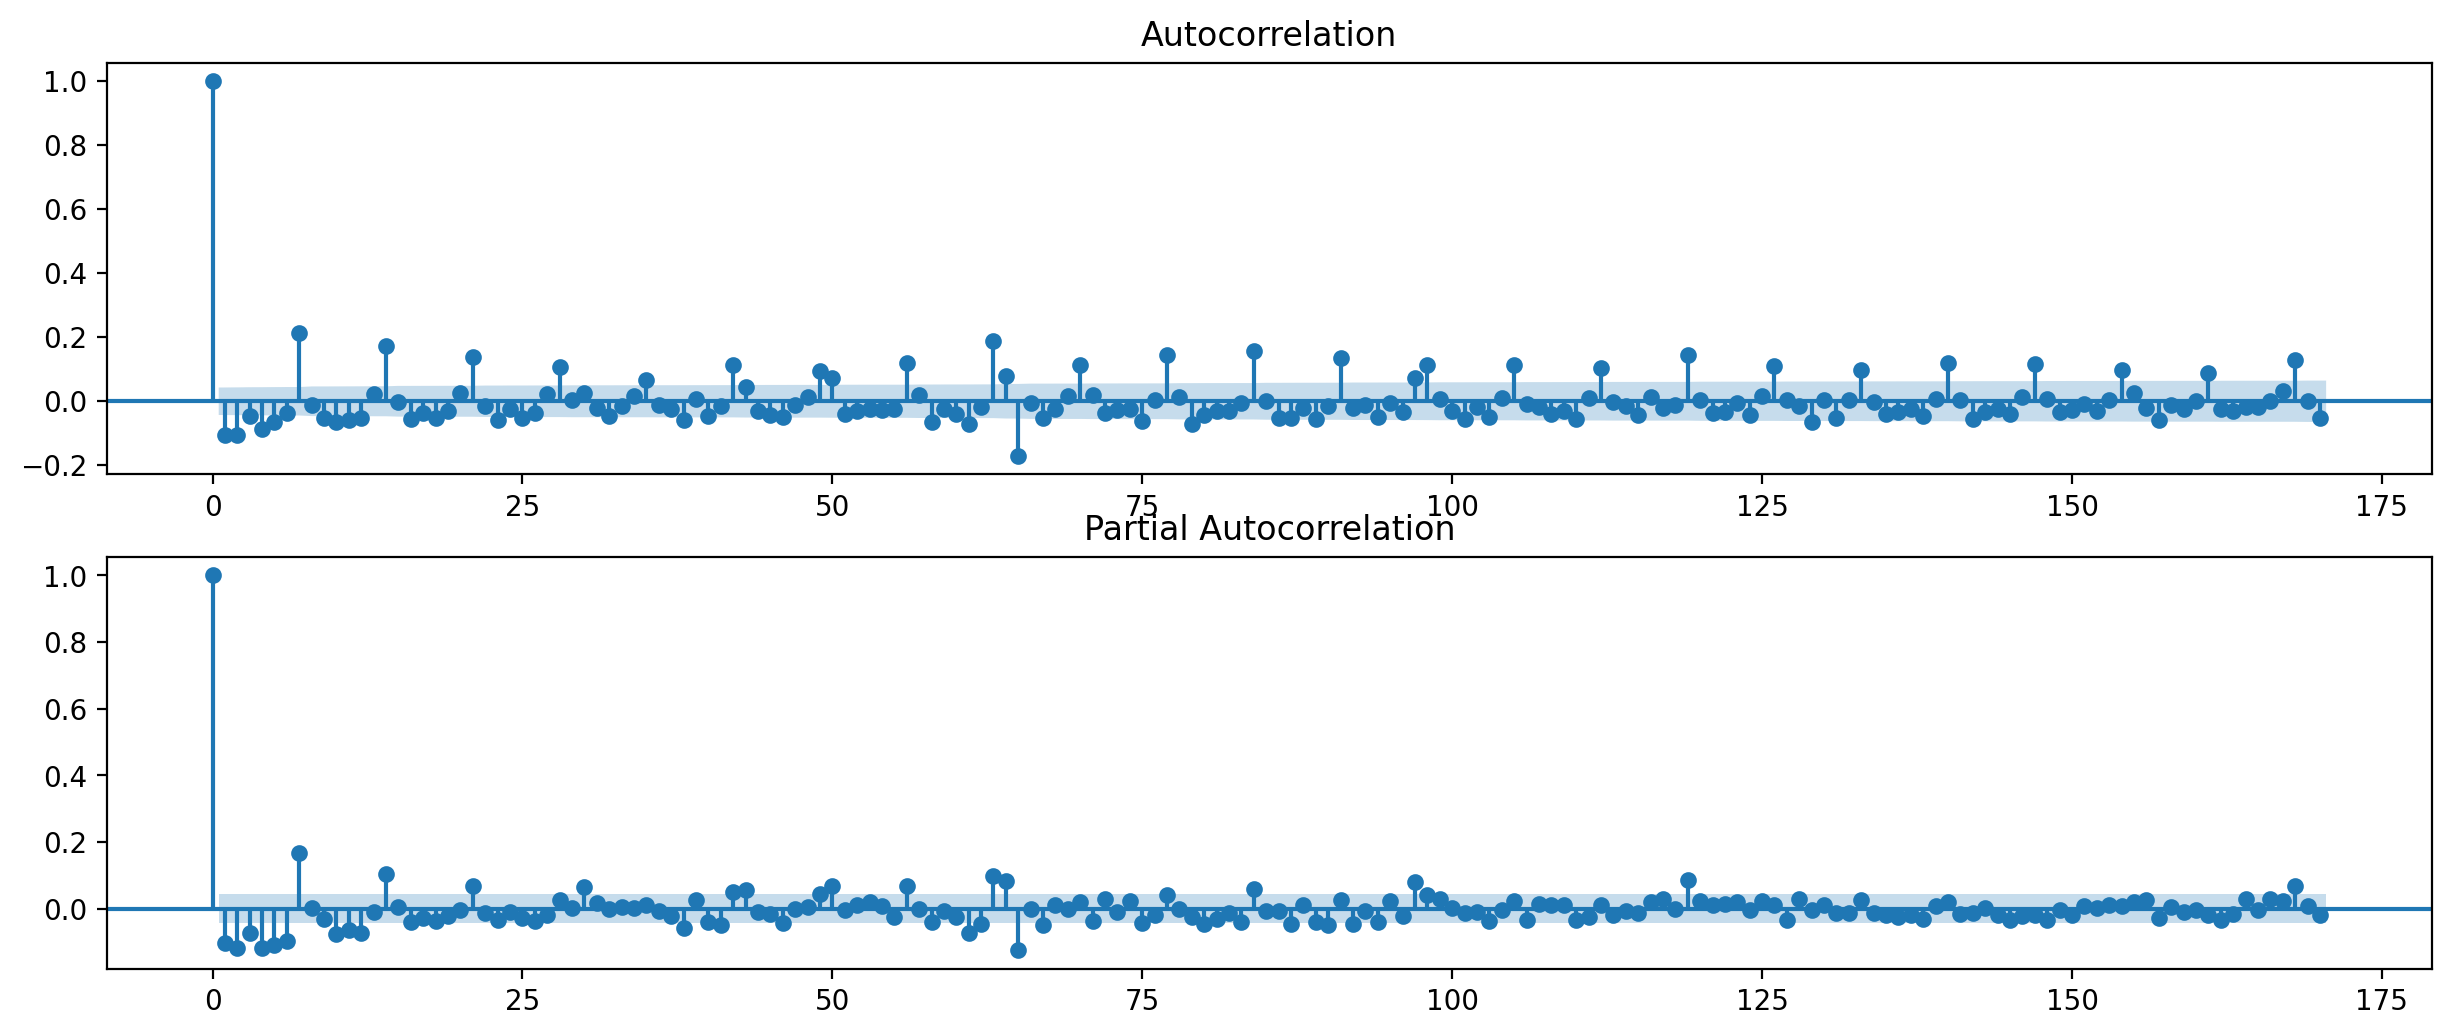

In [310]:
plot_cycles("Ben&Ben")

### NOBITA

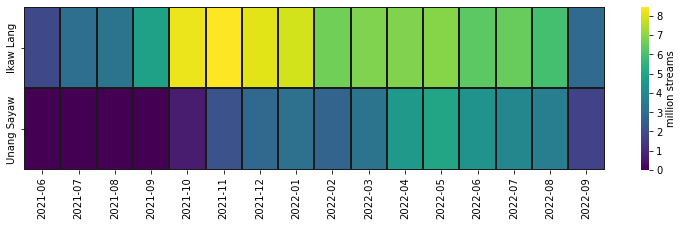

In [198]:
plot_heatmap("NOBITA",13, 3)

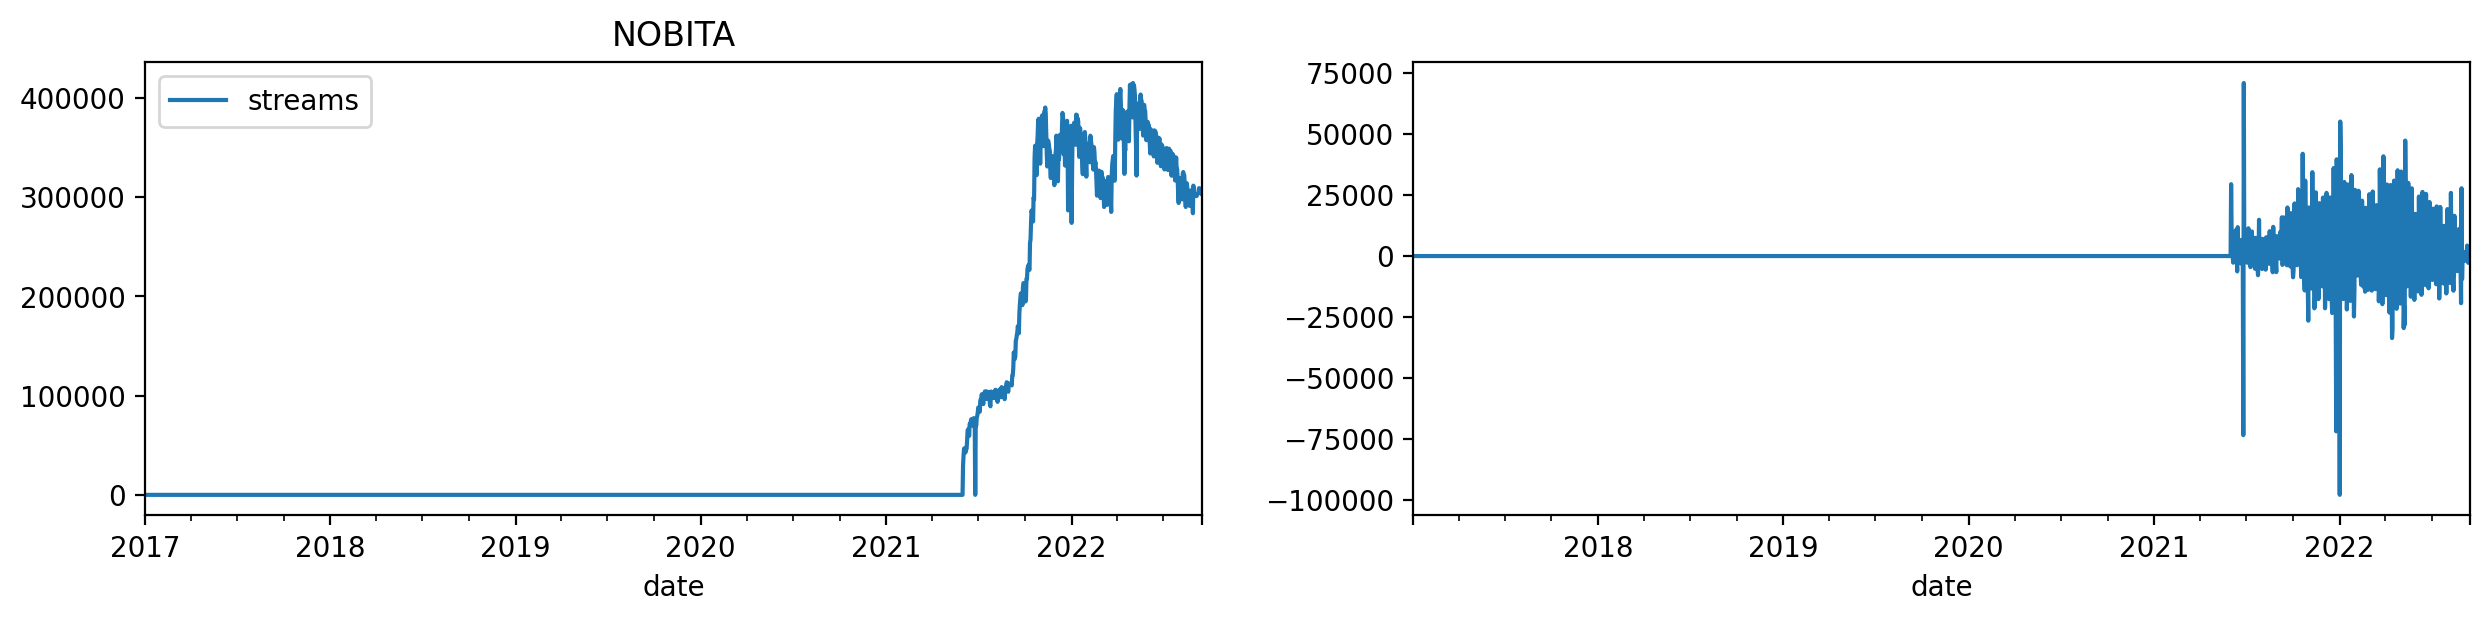

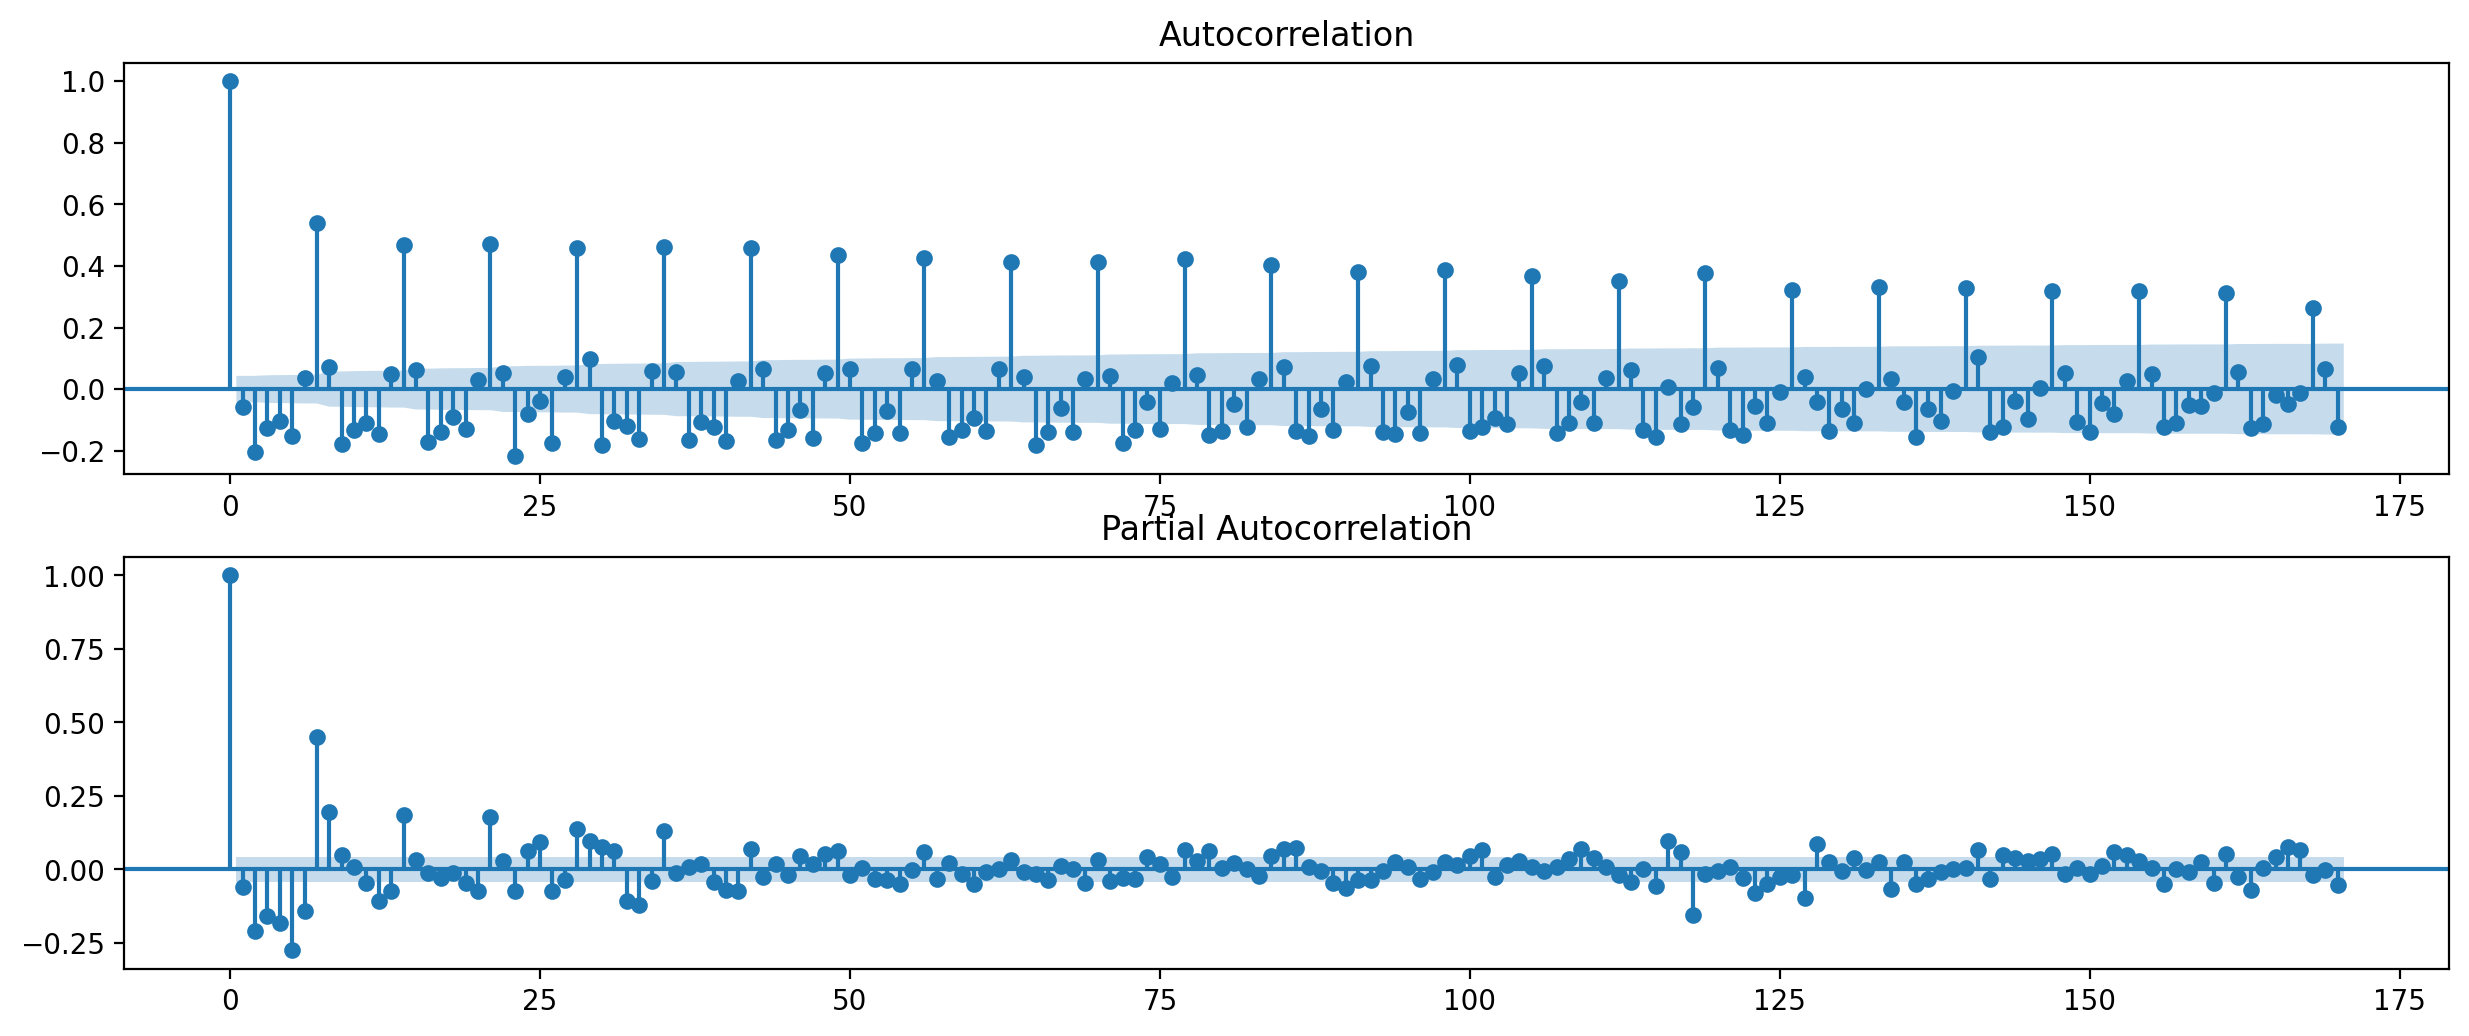

In [314]:
plot_cycles("NOBITA")